In [6]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('reviews.csv')
dataset.drop(columns="Id", inplace=True)
dataset

,Review,Label
0,good and interesting,5.0
1,"This class is very helpful to me. Currently, I...",5.0
2,like!Prof and TAs are helpful and the discussi...,5.0
3,Easy to follow and includes a lot basic and im...,5.0
4,Really nice teacher!I could got the point eazl...,4.0
...,...,...
6478,"Very educational course, however the lectures ...",4.0
6479,good work thank you all,5.0
6480,The course is really interesting and I found i...,3.0
6481,This course is very interesting but in some po...,4.0


In [7]:
dataset = dataset.drop_duplicates(ignore_index=True)
dataset

,Review,Label
0,good and interesting,5.0
1,"This class is very helpful to me. Currently, I...",5.0
2,like!Prof and TAs are helpful and the discussi...,5.0
3,Easy to follow and includes a lot basic and im...,5.0
4,Really nice teacher!I could got the point eazl...,4.0
...,...,...
6272,"Very educational course, however the lectures ...",4.0
6273,good work thank you all,5.0
6274,The course is really interesting and I found i...,3.0
6275,This course is very interesting but in some po...,4.0


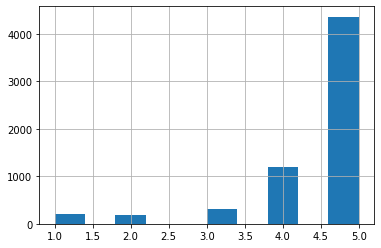

In [8]:
dataset['Label'].hist()

In [9]:
dataset['Label'].value_counts()

5.0    4357
4.0    1194
3.0     321
1.0     216
2.0     188
Name: Label, dtype: int64

In [10]:
# 어중간한 3점 삭제해 버리기
rating_3 = dataset[dataset['Label']==3].index
del_3 = dataset.drop(rating_3)
dataset=del_3

In [11]:
dataset['Label'].value_counts()

5.0    4357
4.0    1194
1.0     216
2.0     188
Name: Label, dtype: int64

In [12]:
# 현재 4~5점(긍정)에 데이터가 너무 많음
#1~2점(부정)과 4~5점(긍정) 데이터 비율을 맞춰주기
def reduce_size(x):
    if len(x.index) > 70000:
        return x.sample(n=int(len(x.index)/35)) #70000/2200
    elif len(x.index) > 17000:
        return x.sample(n=int(len(x.index)/7)) #17000/2200
    else:
        return x

dataset = dataset.groupby('Label').apply(reduce_size).reset_index(drop=True)
dataset['Label'].value_counts()

# 4~5점 = 4601 / 1~2점 = 4622

5.0    4357
4.0    1194
1.0     216
2.0     188
Name: Label, dtype: int64

In [13]:
dataset.shape

(5955, 2)

In [14]:
# train과 test를 나눠주기 위한 준비
X = dataset['Review']
y = dataset['Label']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,  y,  test_size=0.5,shuffle=True,  random_state=1004)
             
print('X_train shape:', X_train.shape)

print('X_test shape:', X_test.shape)

print('y_train shape:', y_train.shape)

print('y_test shape:', y_test.shape)

X_train shape: (2977,)
X_test shape: (2978,)
y_train shape: (2977,)
y_test shape: (2978,)


In [16]:
# train과 test의 데이터에 각 점수들이 반반씩 잘 분포 되었음.
print('train set:', y_train.value_counts())
print('----------------------------')
print('test set:', y_test.value_counts())

train set: 5.0    2194
4.0     578
1.0     113
2.0      92
Name: Label, dtype: int64
----------------------------
test set: 5.0    2163
4.0     616
1.0     103
2.0      96
Name: Label, dtype: int64


In [17]:
dataset.dtypes

Review     object
Label     float64
dtype: object

In [18]:
#replace has a default arg inplace=False. 
#Thus, your results will not affect each other and you will have to combine them into dataset['label']=dataset['label'].replace([1,2,4,5],[0,0,1,1]) or 
#dataset['label'].replace([1,2,4,5],[0,0,1,1],inplace=True)

dataset['Label']=dataset['Label'].replace([1,2,4,5],[0,0,1,1])

In [19]:
dataset['Label'].value_counts()

1.0    5551
0.0     404
Name: Label, dtype: int64

In [20]:
X_train

2607    Professor Hecht provides a very thorough and u...
4225                   pretty hard but really interesting
5630    Wonderful course. The resources are very usefu...
2476    wonderful design of content, good business exa...
2226    Good course. But a little too easy for psychol...
                              ...                        
199                       great accounting ratio analysis
1263    Awesome course.. focusing mainly on developing...
5445    A great course in its own right but it also fi...
4127    Turning what I learned in university about dat...
2571    Very well done. I would have liked it if there...
Name: Review, Length: 2977, dtype: object

In [21]:
X_test

3259    Excellente course, thank you for the excellent...
1624    The course is very superficial in nature and t...
264     I recommend this course to all my colleagues. ...
1674    a very good course.i would like more questions...
2233    Really disappointing course. Content is shallo...
                              ...                        
5828    Course was very informative. It also had many ...
1669    Great introduction into Data Analysis. I am ex...
2745    This course will supplement your class, but do...
4992    Thank you for sharing us the guidance for crea...
2785    I am just in the middle of this course. Mr. Fo...
Name: Review, Length: 2978, dtype: object

In [22]:
# train과 test의 데이터에 각 점수들이 반반씩 잘 분포 되었음.
print('train set:', y_train.value_counts())
print('----------------------------')
print('test set:', y_test.value_counts())

train set: 5.0    2194
4.0     578
1.0     113
2.0      92
Name: Label, dtype: int64
----------------------------
test set: 5.0    2163
4.0     616
1.0     103
2.0      96
Name: Label, dtype: int64


In [33]:
# concat()dms df와 series에 다 적용가능
train_set = pd.concat([X_train, y_train], axis = 1)
print(train_set)

                                                 Review  Label
2607  Professor Hecht provides a very thorough and u...    5.0
4225                 pretty hard but really interesting    5.0
5630  Wonderful course. The resources are very usefu...    5.0
2476  wonderful design of content, good business exa...    5.0
2226  Good course. But a little too easy for psychol...    5.0
...                                                 ...    ...
199                     great accounting ratio analysis    5.0
1263  Awesome course.. focusing mainly on developing...    5.0
5445  A great course in its own right but it also fi...    5.0
4127  Turning what I learned in university about dat...    5.0
2571  Very well done. I would have liked it if there...    4.0

[2977 rows x 2 columns]


In [34]:
from bs4 import BeautifulSoup

example1 = BeautifulSoup(train_set['Review'][7], "html5lib")
print(train_set['Review'][:20])


example1.get_text()[:10]

KeyError: ignored

In [25]:
import re
letters_only= re.sub('[^a-zA-Z]', ' ', example1.get_text())
letters_only[:10]

NameError: ignored

In [26]:
# 모두 소문자로 변환한다.
lower_case = letters_only.lower()
# lower_case = letters_only['Review'].str.lower()      # Q str?

NameError: ignored